# L02 Assignment - Lab: Practical AI Model Development with Tensorflow Lite
- Course: AI & Robotics - Data Science Applications
- Lab Title: Converting and Deploying AI Models using TensorFlow Lite
- Estimated Time: 2-3 Hours
- Libaries Required: TensorFlow, MNIST, Numpy, MatplotLib

**Objective**
1. Set up your Python environment for TensorFlow Lite
2. Train a simple neural network for the MNIST Dataset
3. Convert the trained model into TensorFlow Lite format
4. Load and test the converted model using TensorFlow Lite Interpreter

By completing this lab, you will gain **hands on experience with AI model conversion and inference**-a crucial step for deploying AI models on resource-constrained devices(even though we will use a simulated environment).

## Part 1: Setting Up the Development Environment

In [1]:
# Let's verify that we have Python and TensorFlow installed
!python --version !pip show tensorflow
# for if TensorFlow isn't installed
!pip install tensorflow

Python 3.11.11


In [2]:
# other libraries
!pip install matplotlib

## Part 2: Creating and Training an AI Model

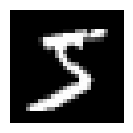

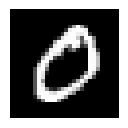

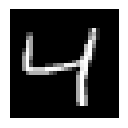

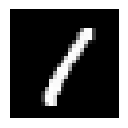

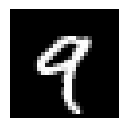

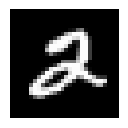

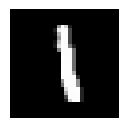

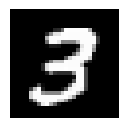

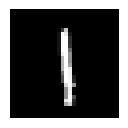

In [3]:
# importing libraries
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show Sample Images
plt.figure(figsize=(5,5)) 
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis('off')
    plt.show()

### Define and Train Neural Network
- Creating a simple feedforward neural network

In [4]:
# Define model architecture 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)), # Input Layer (Flatten 28x28 pixels)
                            tf.keras.layers.Dense(128, activation = 'relu'), # Hidden Layer
                            tf.keras.layers.Dense(10, activation = 'softmax')]) # Output layer (10 classes)
# Compile model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train Model
model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

# Save trained model 
model.save("mnist_model.h5")
print("Model training complete and saved as mnist_model.h5")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8802 - loss: 0.4313 - val_accuracy: 0.9601 - val_loss: 0.1353
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9651 - loss: 0.1188 - val_accuracy: 0.9710 - val_loss: 0.1004
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0806 - val_accuracy: 0.9722 - val_loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9826 - loss: 0.0548 - val_accuracy: 0.9752 - val_loss: 0.0842
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9773 - val_loss: 0.0760


Model training complete and saved as mnist_model.h5


## Part 3: Converting and Saving the Model
- Converting the model to the TensorFlow Lite format

In [5]:
# Load trained model
model = tf.keras.models.load_model("mnist_model.h5")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert() 

# Save the converted model
with open("mnist_model.tflite", "wb") as f:
    f.write(tflite_model)
print("Model successfully converted and saved as mnist_model.tflite")

INFO:tensorflow:Assets written to: C:\Users\ETHANP~1\AppData\Local\Temp\tmp2zfdveep\assets


INFO:tensorflow:Assets written to: C:\Users\ETHANP~1\AppData\Local\Temp\tmp2zfdveep\assets


Saved artifact at 'C:\Users\ETHANP~1\AppData\Local\Temp\tmp2zfdveep'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1930155767760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1930155767568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1930583564048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1928441044176: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model successfully converted and saved as mnist_model.tflite


## Part 4: Loading and Running Inference with TensorFlow Lite
- Load the Converted model using TensorFlow Lite Interpreter

In [6]:
# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path = "mnist_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:", input_details)
print("Output Details:", output_details)

Input Details: [{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 28, 28], dtype=int32), 'shape_signature': array([-1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 9, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


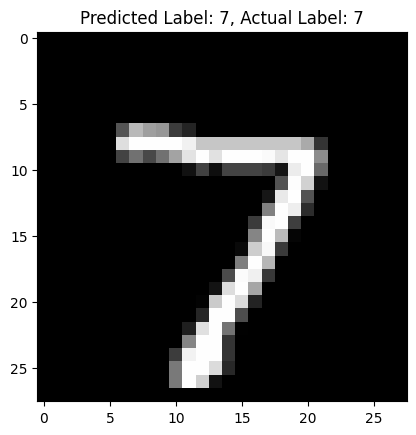

In [7]:
# Select a test image
test_image = x_test[0].astype(np.float32)

# Ensure data type matches model input
test_image = np.expand_dims(test_image, axis = 0) # Reshape for model input

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], test_image)

# Run Inference
interpreter.invoke() 

# Get the prediction
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)

# Display the image and prediction
plt.imshow(x_test[0], cmap = "gray")
plt.title(f"Predicted Label: {predicted_label}, Actual Label: {y_test[0]}")
plt.show()

# End of Lab L02